
<center>
<h1> <font color=blue>Compte rendu TP3:Linear Regression </font> </h1> </center>
<h2> <center><font color=green>Réalisé par Ben Amor Oumayma</font> </center> </h2>
<h2> <center><font color=black>3DNI2</font> </center> </h2>
 
 

## <font color=brown>Introduction:
la régression linéaire est une approche linéaire de la modélisation de la relation entre une réponse scalaire et une ou plusieurs variables explicatives (également appelées variables dépendantes et indépendantes ). Le cas d'une variable explicative est appelé régression linéaire simple ; pour plus d'un, le processus est appelé régression linéaire multiple . Ce terme est distinct de la régression linéaire multivariée , où plusieurs variables dépendantes corrélées sont prédites, plutôt qu'une seule variable scalaire.</font>

# <font color=brown> Exercice 1 : Régression linéaire simple </font>

La régression linéaire simple modélise la relation entre l'amplitude d'une variable et celle d'une seconde - par exemple, lorsque X augmente, Y augmente également. Ou alors que X augmente, Y diminue. 1 La corrélation est une autre façon de mesurer la relation entre deux variables: voir la section «Corrélation» . La différence est que si la corrélation mesure la force d'une association entre deux variables, la régression quantifie la nature de la relation.

In [2]:
import pandas as pd

In [4]:
grav= pd.read_csv('grav.csv')

In [5]:
grav.head()

,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


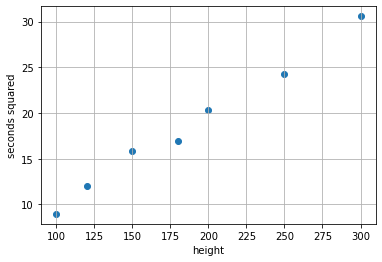

In [6]:
import matplotlib.pyplot as plt
x= grav['height']
y= grav ['seconds squared']
plt.grid()
plt.xlabel('height')
plt.ylabel('seconds squared')
plt.scatter(x,y)
plt.show()

In [7]:
from scipy import stats
a, b, r_value, p_value, std_err = stats.linregress(x, y)
print("a:slopt= %f    b:intercept= %f" % (a, b))

a:slopt= 0.102809    b:intercept= -0.680123


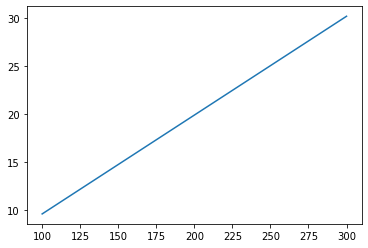

In [10]:
slope=a
intercept=b

def predict(x):
    return slope * x + intercept
line= predict(x)
plt.plot(x,line)


In [11]:
X_train = grav
Y_train = x/y
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_train)
print(y_pred)


[10.82770101 10.14494807  9.55483032 10.72926152  9.87096057 10.50320678
  9.57560209]


In [12]:
stats.linregress(x,y)

LinregressResult(slope=0.10280912511759172, intercept=-0.6801232361241745, rvalue=0.9947324344135698, pvalue=3.857021649169523e-06, stderr=0.004737919558962453)

In [ ]:
# we can use statsmodels module 

In [14]:
import statsmodels.api as sm


In [21]:
#inputs
X = grav['height']
Y = grav['seconds squared']

In [16]:
#here we fit the data to the model
model = sm.OLS(Y,X).fit()

In [17]:
# testing the model 
pred = model.predict([400])

In [19]:
print(pred)

[39.82245769]


## <font color=brown> Exercice 2: La régression linéaire multiple</font>


Lorsqu'il y a plusieurs prédicteurs, l'équation est simplement étendu pour les accueillir:

## y= b 0 + b 1 X 1 + b 2 X 2 + ... + b p X p + e
Au lieu d'une ligne, nous avons maintenant un modèle linéaire - la relation entre chaque coefficient et sa variable est linéaire.

In [ ]:
!pip install pyreadstat 

In [25]:
import pyreadstat
df,meta = pyreadstat.read_sav('test_scores.sav')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


In [30]:
df.describe()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


In [27]:
df.shape

(2133, 11)

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


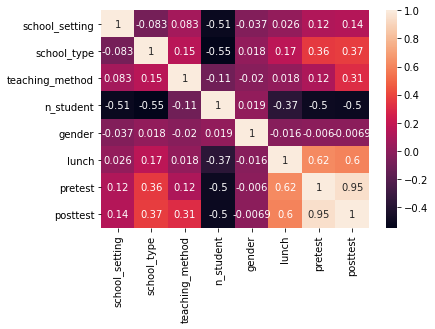

In [36]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

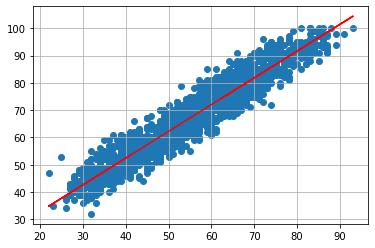

In [76]:
X = df['pretest'] # input variables (X est une dataframe)
y = df['posttest'] # output variable (y est un vecteur)

axes = plt.axes()
axes.grid()

plt.scatter(X,y)

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
def predict(x):
   return slope * x + intercept


fitLine = predict(X)
plt.plot(X, fitLine, c='r')


# DIVISER DATASET

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 100)

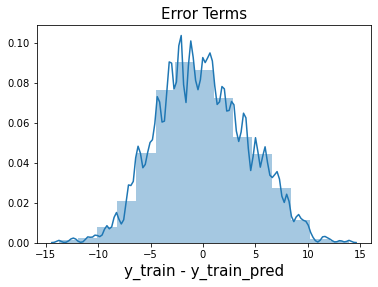

In [95]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Printing the parameters
lr.params
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)
# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train ', fontsize = 15)
plt.show()

# <font color=brown> Exercice 3</font>

### 1. Import the data and specify the variable types with the Type node.

In [3]:
boston = pd.read_csv('housing.data.txt' , sep=",")
# Affichage de la taille du dataset 
print(boston.shape)


(506, 14)


In [4]:
# Affichage des 10 premières lignes
boston.head()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# affichage d'informations sur les données 
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CIRM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 2. Add a Regression node to the stream and select MEDV as the target variable and all other variables as the
input.

In [8]:
import numpy as np
X = boston.drop("MEDV", axis=1)
Y = boston["MEDV"].to_numpy() #y est un vecteur
print('X:', np.shape(X), 'y:', np.shape(Y))

X: (506, 13) y: (506,)


### divide the dataset into 70 % training data and 30 % test data

In [11]:
from sklearn.model_selection import train_test_split


# `stratify`  permet de s'assurer que les variables y sont équitablement réparties entre les deux ensembles train et test.
bins = np.linspace(Y.min(), Y.max(), 100)
y_binned = np.digitize(Y, bins)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


In [12]:
# Fitting the training data to our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

regressor.score(X_test, Y_test)


0.6872122809626446

### 5. What is the value of R2 and the adjusted R2 ?

In [14]:
from sklearn.metrics import mean_squared_error, r2_score 

#Prédiction des les données d'apprentissage X_train par la méthode .predict()
Y_pred = regressor.predict(X_train)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
r2 = r2_score(Y_train, Y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur les données de test X_test par la méthode .predict()
Y_pred = regressor.predict(X_test)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.7506477558555941  et RMSE= 4.461793457161063
Testing: R2= 0.6872122809626446  et RMSE= 5.453633333553372


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# K-fold cross-validation et GridSearchCV
pipelines = []
params = []
names = []


pipelines.append(Pipeline([('clf', LinearRegression())]))
params.append({'clf__normalize':[True]})
names.append('LinearRegression')#n_jobs = -1 signifie que le calcul sera distribué sur tous les CPU de l'ordinateur.

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

def model(pipeline, parameters, name, X, Y):    
    cv = KFold(n_splits=2, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,Y)  
    print(name, 'R2:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,Y) # training sur tout training dataset
    return estimator 
estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, Y_train))

LinearRegression R2: 0.6870622843636652
